In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Load data 
df = pd.read_csv("hiscores.csv")

# Convert score_time to datetime, then to numerical value (e.g., timestamp)
df['score_time'] = pd.to_datetime(df['score_time'])

# Convert datetime to Unix timestamp (seconds since epoch)
df['score_timestamp'] = df['score_time'].astype('int64') // 10**9  # or use .view('int64') in newer pandas

# Define features and target
X = df[['score_timestamp']]   # time is your independent variable
y = df['pp']                  # pp is the dependent variable

df.head()

,beatmap_id,score,pp,mods,rank,score_time,update_time,score_timestamp
0,4895825,4003396,221.687,0,S,2025-03-08 05:33:04+00:00,2025-07-23T23:46:15.000Z,1741411984
1,4857995,5109062,226.332,0,S,2025-03-20 03:35:38+00:00,2025-07-23T23:46:15.000Z,1742441738
2,4793476,1948334,250.582,0,A,2025-04-11 00:12:17+00:00,2025-07-23T23:46:15.000Z,1744330337
3,4947078,4599010,238.777,0,A,2025-04-12 02:52:16+00:00,2025-07-23T23:46:15.000Z,1744426336
4,4670418,6141520,218.509,0,A,2025-04-17 16:58:18+00:00,2025-07-23T23:46:15.000Z,1744909098


Mean Squared Error: 533.67


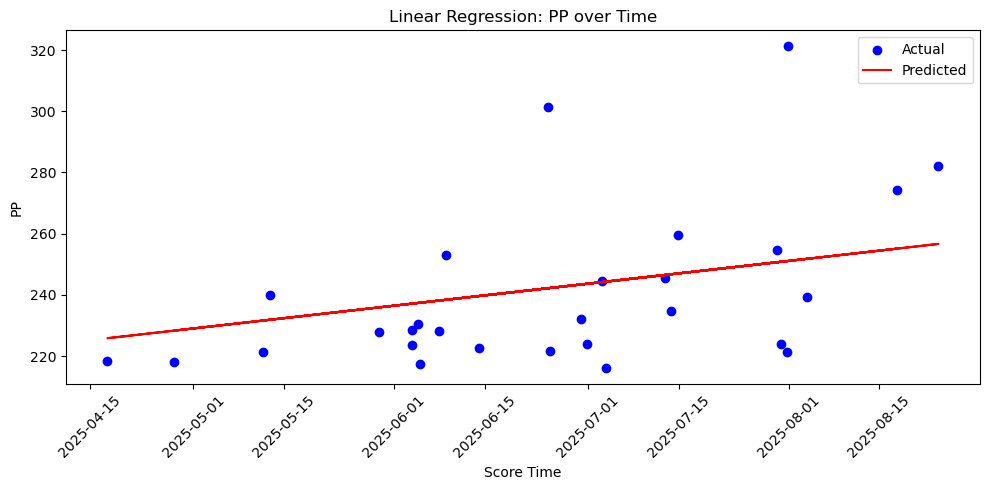

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plotting the results
import matplotlib.dates as mdates

# Convert timestamps back to datetime for plotting
X_test_datetime = pd.to_datetime(X_test['score_timestamp'], unit='s')

plt.figure(figsize=(10, 5))
plt.scatter(X_test_datetime, y_test, color='blue', label='Actual')
plt.plot(X_test_datetime, y_pred, color='red', label='Predicted')

# Formatting the x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Score Time')
plt.ylabel('PP')
plt.title('Linear Regression: PP over Time')
plt.legend()
plt.xticks(rotation=45)  # rotate dates for readability
plt.tight_layout()
plt.show()


In [3]:
# predict future pp growth
future_date = pd.to_datetime("2025-12-01T00:00:00.000Z")
future_timestamp = int(future_date.timestamp())
future_pp = model.predict(pd.DataFrame({'score_timestamp': [future_timestamp]}))
print(f"Predicted PP on {future_date}: {future_pp[0]:.2f}")

Predicted PP on 2025-12-01 00:00:00+00:00: 280.35
